<h1> Fake News Detection System using Machine Learning </h1>

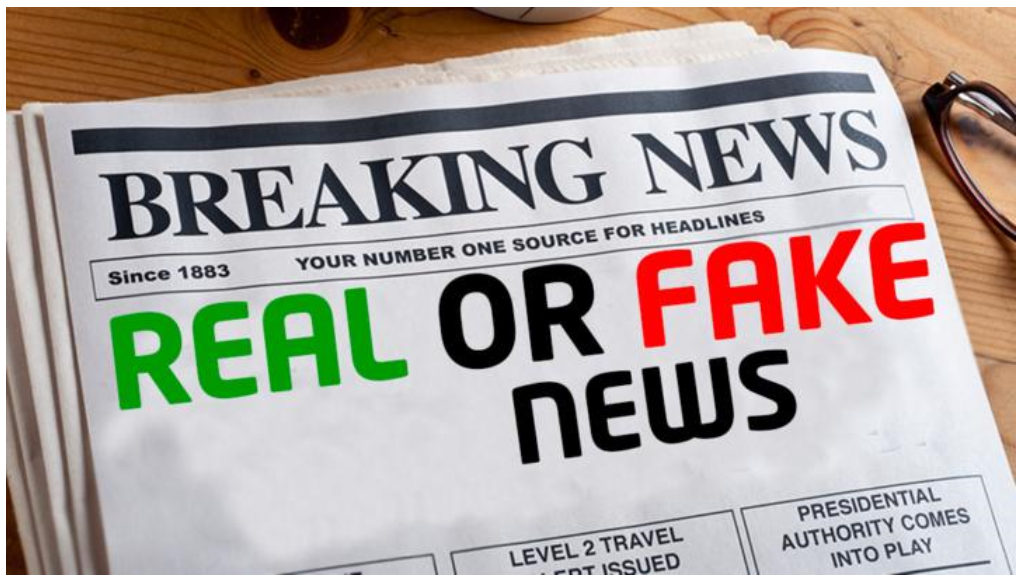

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read datasets

In [3]:
fake = pd.read_csv("C:/Users/DSALUNKE/OneDrive - Capgemini/Desktop/fake-news/1/Fake.csv")
true = pd.read_csv("C:/Users/DSALUNKE/OneDrive - Capgemini/Desktop/fake-news/1/True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

## Data cleaning and preparation

In [4]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [5]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [6]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [7]:
# Check the data
data.head()

,title,text,subject,date,target
0,NO “Dead broke” LESBIANS ALLOWED…,Hillary heads to DC for an exclusive fundraise...,left-news,"Jun 9, 2015",fake
1,Uncle of Benghazi Victim Sean Smith: “Hillary ...,Hillary Clinton is a serial liar. Hillary Cli...,politics,"Oct 23, 2015",fake
2,EPA hit hardest as Trump budget targets regula...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"March 16, 2017",true
3,Catalan leader Puigdemont to speak in Catalan ...,MADRID (Reuters) - Catalan leader Carles Puigd...,worldnews,"October 6, 2017",true
4,Putin and Trump likely to discuss Ukraine sanc...,WASHINGTON/MOSCOW (Reuters) - Russian Presiden...,politicsNews,"January 27, 2017",true


In [8]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,NO “Dead broke” LESBIANS ALLOWED…,Hillary heads to DC for an exclusive fundraise...,left-news,fake
1,Uncle of Benghazi Victim Sean Smith: “Hillary ...,Hillary Clinton is a serial liar. Hillary Cli...,politics,fake
2,EPA hit hardest as Trump budget targets regula...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,true
3,Catalan leader Puigdemont to speak in Catalan ...,MADRID (Reuters) - Catalan leader Carles Puigd...,worldnews,true
4,Putin and Trump likely to discuss Ukraine sanc...,WASHINGTON/MOSCOW (Reuters) - Russian Presiden...,politicsNews,true


In [9]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Hillary heads to DC for an exclusive fundraise...,left-news,fake
1,Hillary Clinton is a serial liar. Hillary Cli...,politics,fake
2,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,true
3,MADRID (Reuters) - Catalan leader Carles Puigd...,worldnews,true
4,WASHINGTON/MOSCOW (Reuters) - Russian Presiden...,politicsNews,true


In [10]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,hillary heads to dc for an exclusive fundraise...,left-news,fake
1,hillary clinton is a serial liar. hillary cli...,politics,fake
2,washington (reuters) - president donald trump’...,politicsNews,true
3,madrid (reuters) - catalan leader carles puigd...,worldnews,true
4,washington/moscow (reuters) - russian presiden...,politicsNews,true


In [11]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [12]:
# Check
data.head()

,text,subject,target
0,hillary heads to dc for an exclusive fundraise...,left-news,fake
1,hillary clinton is a serial liar hillary clin...,politics,fake
2,washington reuters president donald trump’s a...,politicsNews,true
3,madrid reuters catalan leader carles puigdemo...,worldnews,true
4,washingtonmoscow reuters russian president vl...,politicsNews,true


In [13]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DSALUNKE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
data.head()

,text,subject,target
0,hillary heads dc exclusive fundraiser hosted o...,left-news,fake
1,hillary clinton serial liar hillary clinton ha...,politics,fake
2,washington reuters president donald trump’s ad...,politicsNews,true
3,madrid reuters catalan leader carles puigdemon...,worldnews,true
4,washingtonmoscow reuters russian president vla...,politicsNews,true


## Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


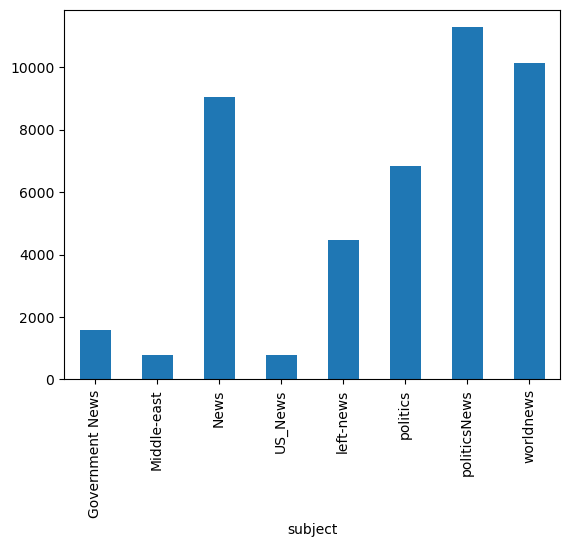

In [15]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


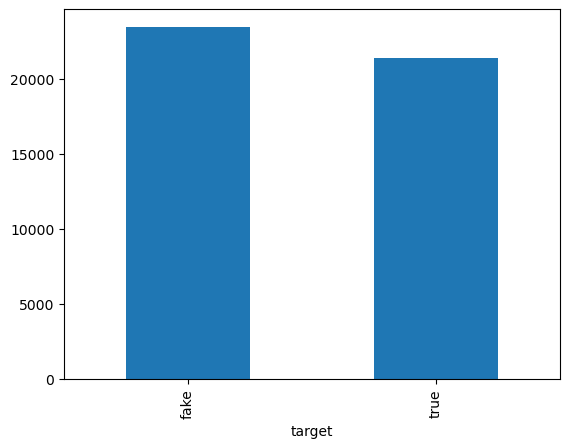

In [16]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

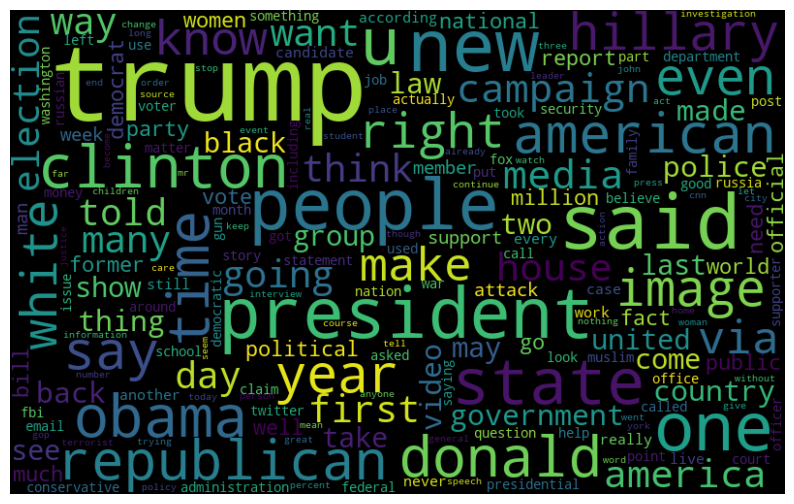

In [18]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

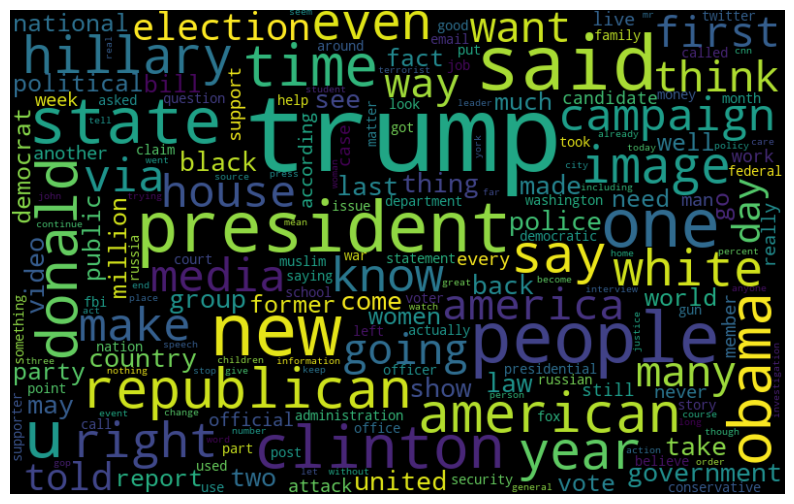

In [19]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

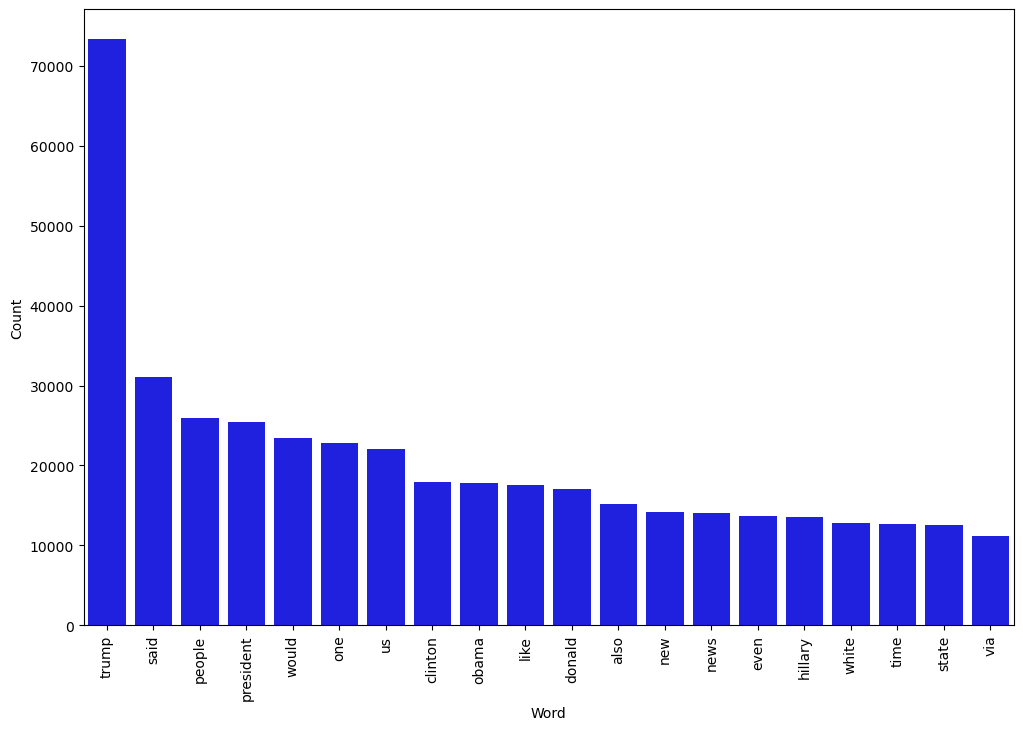

In [21]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

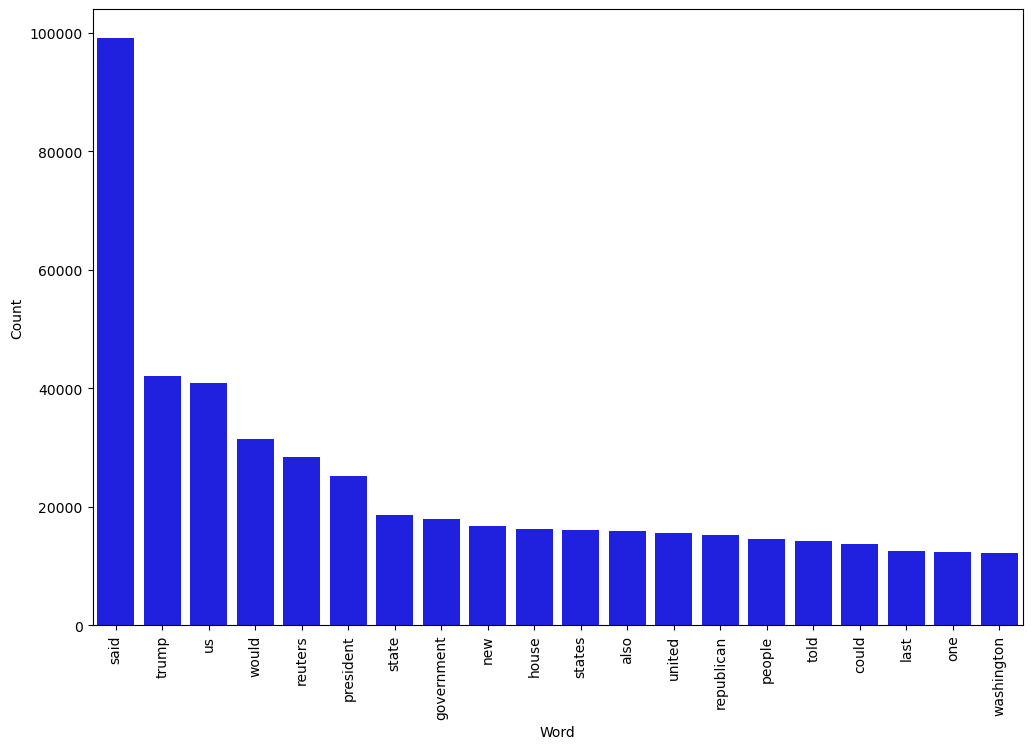

In [22]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Modeling

In [23]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Preparing the data

In [24]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# **Naive Bayes**




In [25]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.35%


Confusion matrix, without normalization


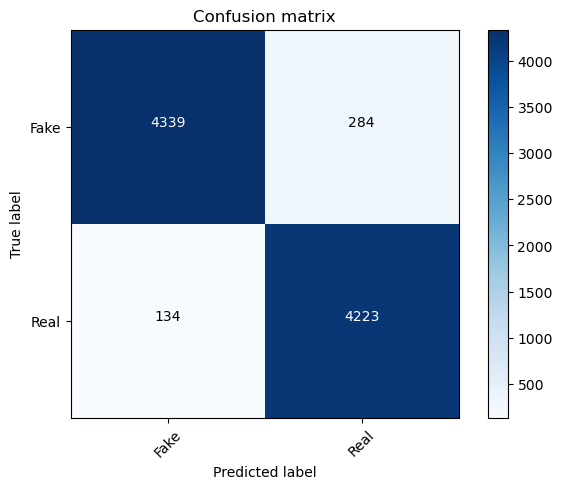

In [26]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Logistic regression**

In [27]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 98.89%


Confusion matrix, without normalization


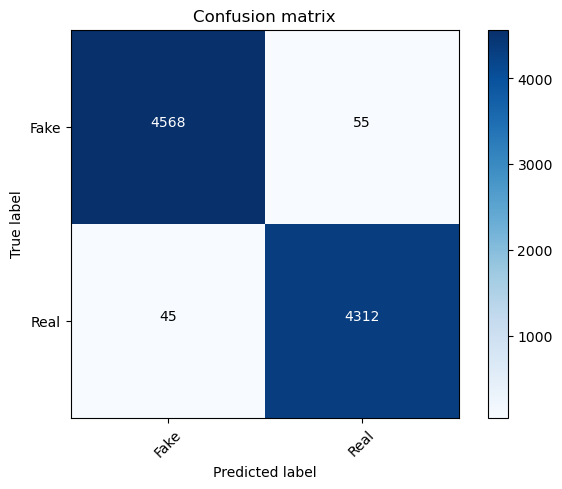

In [28]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Decision Tree**

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.7%


Confusion matrix, without normalization


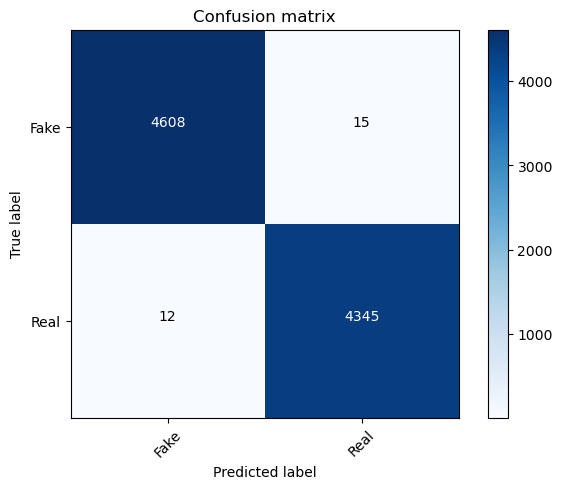

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 99.27%


Confusion matrix, without normalization


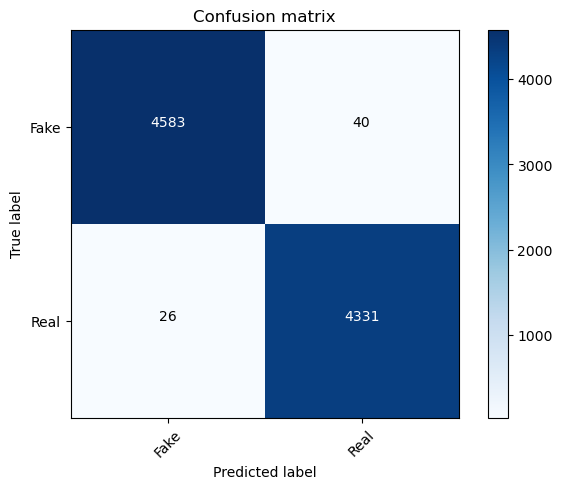

In [33]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Comparing** **Different Models**

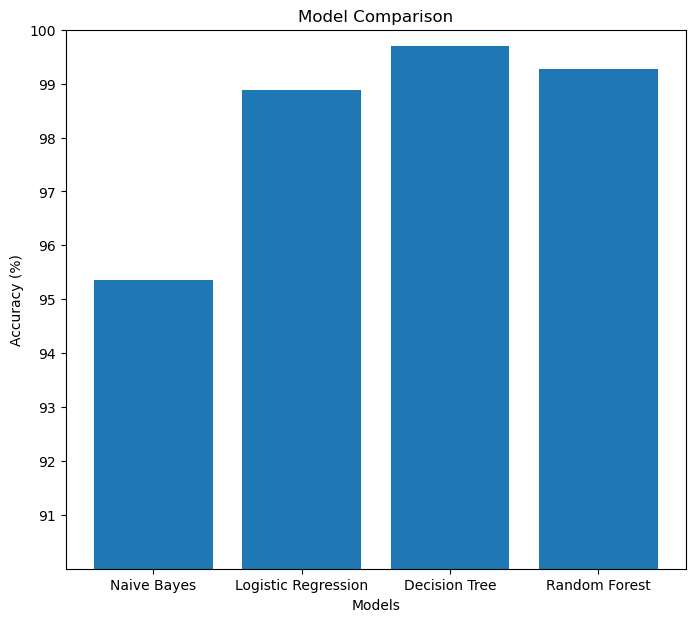

In [8]:
import matplotlib.pyplot as plt

# Define or initialize the dictionary dct
dct = {'Naive Bayes': 95.35, 'Logistic Regression': 98.89, 'Decision Tree': 99.7, 'Random Forest': 99.27}  # Replace with your actual data

plt.figure(figsize=(8, 7))
plt.bar(list(dct.keys()), list(dct.values()))
plt.ylim(90, 100)
plt.yticks(range(91, 101))  # Setting y-ticks from 91 to 100
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')
plt.show()

In [28]:
## Model Testing

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define a preprocessing function (wordopt)
def wordopt(text):
    # Example preprocessing function, replace with your actual preprocessing steps
    return text.lower()  # Convert text to lowercase

# Define or import your dataset
# For demonstration purposes, I'm creating a dummy DataFrame
data = pd.DataFrame({
    'text': ["This is a sample news article.", "Another news article here."],
    'label': [0, 1]  # Example labels (0 for fake, 1 for real)
})

# Define features (X) and labels (y)
X = data['text']
y = data['label']

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform vectorizer on training data
X_vectorized = vectorizer.fit_transform(X)

# Define and train your models
NB = MultinomialNB()
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()

# Fit models on training data
NB.fit(X_vectorized, y)
LR.fit(X_vectorized, y)
DT.fit(X_vectorized, y)
RFC.fit(X_vectorized, y)

# Define function to output label based on prediction
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

# Define function for manual testing
def manual_testing(news):
    # Preprocess input news
    preprocessed_news = wordopt(news)
    
    # Transform preprocessed news into vectorized format
    news_vectorized = vectorizer.transform([preprocessed_news])
    
    # Get predictions from each model
    pred_NB = NB.predict(news_vectorized)
    pred_LR = LR.predict(news_vectorized)
    pred_DT = DT.predict(news_vectorized)
    pred_RFC = RFC.predict(news_vectorized)
    
    # Output predictions
    print("\n\nNB Prediction: {}".format(output_label(pred_NB[0])))
    print("LR Prediction: {}".format(output_label(pred_LR[0])))
    print("DT Prediction: {}".format(output_label(pred_DT[0])))
    print("RFC Prediction: {}".format(output_label(pred_RFC[0])))

# Example usage
news_input = input("Enter news: ")
manual_testing(news_input)


Enter news: Trump wants Postal Service to charge 'much more' for Amazon shipments


NB Prediction: Fake News
LR Prediction: Fake News
DT Prediction: Not A Fake News
RFC Prediction: Fake News
